# Ejercicio 3: Reducción de dimensionalidad
En este ejercicio exploraremos el uso de PCA y t-SNE usando las librerias de scikit-learn. 
Específicamente, reduciremos la dimensionalidad de los datos para analizar cuando un tumor es benigno o maligno.

Para entender el uso de estos metodos con scikit-learn, puedes consultar la documentación oficial de scikit-learn para [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

En este ejercicio:

1. Utilizarás y explorarás un dataset de clasificación de tumores
2. Utilizarás PCA para poder visualizar tus datos de 30 variables en 2 dimensiones
3. Analizarás la proyección de tus datos a una dimensionalidad más baja

## 1. Explorando tus datos
En las siguientes celdas, cargamos el dataset que utilizamos en el ejercicio de regresión logística. Este es un conjunto de datos de clasificación, donde cada punto tiene 30 atributos o variables de entrada. Corre la siguiente celda para cargar el dataset y separar los datos en entrenamiento y prueba.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# En esta ocasión leeremos el dataset como un dataframe de pandas
dataset = load_breast_cancer(as_frame=True)
data_train, data_test, target_train, target_test = train_test_split(
    dataset['data'], 
    dataset['target'], 
    test_size=0.25,
    random_state=10
)
print(f"Datos originales de dimensionalidad {data_train.shape}")

Datos originales de dimensionalidad (426, 30)


Podemos imprimir los primeros tres renglones de nuestros datos. Esto nos sevirá para identificar como son los datos originales antes de aplicar la reducción de dimensionalidad

In [42]:
# Visualizar las primeras tres filas
print("Caracteristicas")
print(data_train.head(3))

Caracteristicas
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
327        12.03         17.93           76.09      446.0          0.07683   
60         10.17         14.88           64.55      311.9          0.11340   
260        20.31         27.06          132.90     1288.0          0.10000   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
327           0.03892        0.001546             0.005592         0.1382   
60            0.08061        0.010840             0.012900         0.2743   
260           0.10880        0.151900             0.093330         0.1814   

     mean fractal dimension  ...  worst radius  worst texture  \
327                 0.06070  ...         13.07          22.25   
60                  0.06960  ...         11.02          17.45   
260                 0.05572  ...         24.33          39.16   

     worst perimeter  worst area  worst smoothness  worst compactness  \
327            82.74       5

In [43]:
print("Etiquetas")
print(target_train.head(3))

Etiquetas
327    1
60     1
260    0
Name: target, dtype: int32


### 1.2 Implementación de PCA
En clase vimos que la solución de PCA está dada por los vectores propios de la matriz de covarianza. Ya que estós determinan la mejor dirección de proyección según las asunciones del método. Para que esto sea cierto, espera que los datos usados para calcular la matriz de covarianza se encuentren normalizados. La función para normalizar la distribución se encuentra implementada de la siguiente manera:



In [44]:
def norm_data(X):
    mean = X.mean(0)
    std = X.std(0)
    X_proc = (X - mean)
    new_data = X_proc / std
    return new_data

feat1, feat2 = "mean radius", "mean compactness"
X = data_train[[feat1, feat2]].to_numpy()
X = norm_data(X)
eigvecs, eigvals = get_principal_components(X)
print(eigvecs, eigvals)
print(X.shape)

normed_data_train = norm_data(data_train)
# Datos normalizados (media cero y misma escala)
X = normed_data_train[[feat1, feat2]].to_numpy()
eigvecs, eigvals = get_principal_components(X)
print(eigvecs, eigvals)
n = X.shape[0]


[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]] [1.520137   0.48456888]
(426, 2)
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]] [0.48456888 1.520137  ]


En la siguiente celda, termina el método para calcular los valores y vectores propios de la matríz de covarianza.
Recuerda que los vectores propios $v \in \mathbb{R}^{D \times D}$ donde `v_[:, i]` corresponde al vector (columna) propio $v_i$. 

In [45]:
def get_principal_components(X):
    '''
        Calcula los vectores y valores propios de una matriz con media cero X
        args:
            - X  (np.ndarray): Matriz de datos de dimensionalidad N x D
        returns:
            - eigenvectors (np.ndarray): vectores propios de la matriz de cov. de X.  Dimensionalidad de D x D
            - eigenvalues (np.ndarray, dtype=float): valores propios de la matriz de cov. de X en el mismo orden que los vectores propios
    '''
    x_normalizada = norm_data(X)
    sample_cov = np.cov(x_normalizada, rowvar=0)
    # TODO: Calcula los vectores propios y regresalos en orden 
    # del mayor al menor valor propio. 
    # Investiga:
    #   - la función np.argsort
    #   - Como invertir una lista en python
    eig_val, eig_vec = np.linalg.eig(sample_cov)
    ind = np.argsort(eig_val, axis=0)[::-1]
    eigenvectors = eig_vec[:,ind]
    return eigenvectors, eig_val
#get_principal_components(X)

Una vez implementado el método anterior, corre la siguiente celda para visualizar los vectores propios sobre los datos normalizados

(426, 2)
(2, 2)


Text(0, 0.5, 'mean compactness')

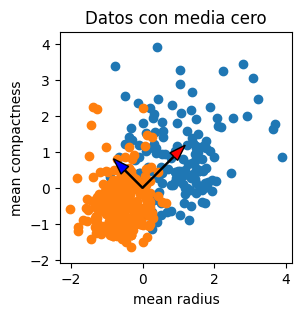

In [46]:
feat1, feat2 = "mean radius", "mean compactness"
labels = target_train
X = data_train[[feat1, feat2]].to_numpy()
X = norm_data(X)
print(X.shape)
eigvecs, eigvals = get_principal_components(X)
print(eigvecs.shape)
# ========== Graficas ===============
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
# Espacio original
for c in range(2):
    ax.scatter(
        X[:, 0][labels == c], 
        X[:, 1][labels == c], 
        label = f"class {c}"
    )

# Graficamos los vectores sobrepuestos a los datos en el ax anterior
c = ['r','b']
for idx_col in range(eigvals.shape[0]):
    norm_eig = np.sqrt(eigvals[idx_col])
    start_point = np.mean(X, axis=0)
    end_point = eigvecs[:, idx_col] * norm_eig
    color = c[idx_col]
    ax.arrow(*start_point, *end_point, facecolor=color, width = 0.03, head_width = 0.3)
ax.axis('equal')
ax.set_title('Datos con media cero')
ax.set_xlabel(feat1)
ax.set_ylabel(feat2)

Responde:
- Si proyectamos los puntos a ambos vectores propios ¿cual nos dará una mejor separabilidad de clase (azul, rojo)? El rojo
- Usando la imagen anterior como referencia ¿Cual de los dos vectores propios tiene un mayor valor propio (azul, rojo)? Explica la motivación de tu respuesta. El rojo ya que es el que tiene un mayor valor propio que puede capturar la dirección que tiene una mayor variablidad de los datos.

#### 1.3 Proyección a una dimensión
Ahora que has visto tus datos considerando solo dos variables distintas, vamos a proyectar los datos al primer componente principal ambos para visualizar como se verían en 1 sola dimensión.
Completa y corre las siguientes celdas

In [47]:
normed_data_train = norm_data(data_train)
# Datos normalizados (media cero y misma escala)
X = normed_data_train[[feat1, feat2]].to_numpy()
eigvecs, eigvals = get_principal_components(X)
print(eigvecs, eigvals)
n = X.shape[0]

# TODO: Proyecta los datos al primer componente principal eigvecs[:,0]
X_proj1 = X @ eigvecs[:, 0]

# TODO: Proyecta los datos al segundo componente principal eigvecs[:,1]
X_proj2 = X @ eigvecs[:, 1]

assert (X_proj1.shape == X_proj2.shape and X_proj1.squeeze().shape == (n,)), "Las proyecciones no tienen la dimensionalidad correcta"

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]] [0.48456888 1.520137  ]


In [48]:
# ========= Solución de scikit learn ============#
from sklearn.decomposition import PCA
# TODO: Utiliza la libreria de scikit-learn para reducir X a 1 dimensión
# Invesitga PCA en scikit learn
pca = PCA(n_components=1)
pca = pca.fit(X)
reduced_x = pca.transform(X)
print(reduced_x.shape)

(426, 1)


En la siguiente celda, utilizamos tu implementación de pca para graficar la proyección a los componentes principales.

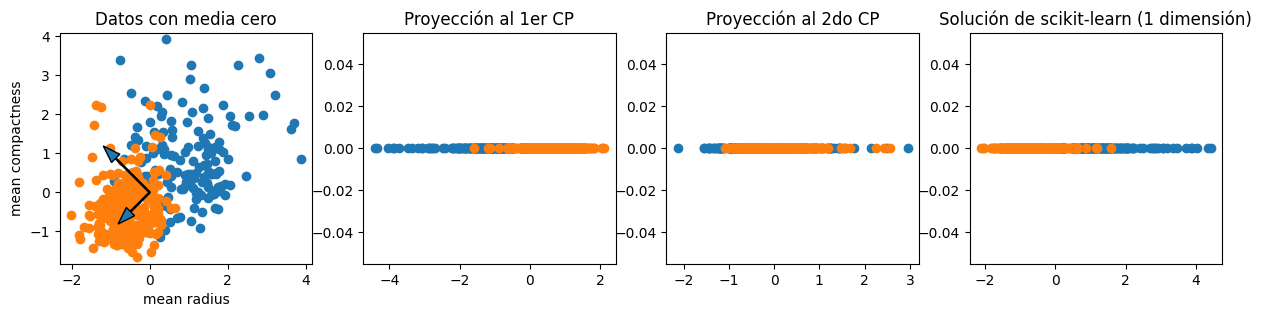

In [49]:
# Recuerda siempre correr la celda anterior antes de correr esta
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 3))
# Espacio original
for c in range(2):
    ax1.scatter(
        X[:, 0][labels == c], 
        X[:, 1][labels == c], 
        label = f"class {c}"
    )

# Graficamos los vectores sobrepuestos a los datos en el ax anterior
for idx_col in range(eigvals.shape[0]):
    norm_eig = np.sqrt(eigvals[idx_col])
    start_point = np.mean(X, axis=0)
    end_point = eigvecs[:, idx_col] * norm_eig
    ax1.arrow(*start_point, *end_point, width = 0.03, head_width = 0.3)
ax1.axis('equal')
ax1.set_title('Datos con media cero')
ax1.set_xlabel(feat1)
ax1.set_ylabel(feat2)

for c in range(2):
    class_data = X_proj1[labels == c]
    N_samples = len(class_data)
    ax2.scatter(
        class_data, 
        np.zeros(N_samples), 
        label = f"class {c}"
    )
ax2.set_title('Proyección al 1er CP')

for c in range(2):
    class_data = X_proj2[labels == c]
    N_samples = len(class_data)
    ax3.scatter(
        class_data, 
        np.zeros(N_samples), 
        label = f"class {c}"
    )
ax3.set_title('Proyección al 2do CP')


## Solución de scikit-learn (1 dim)
# plot reduced data
for c in range(2):
    class_idx = np.where(target_train == c)[0]
    N_samples = len(class_idx)
    ax4.scatter(
        reduced_x[class_idx][:,0],
        np.zeros(N_samples),
        label = f"class {c}"
    )
ax4.set_title('Solución de scikit-learn (1 dimensión)')

plt.show()

Para la tarea de clasificación responde:
- ¿Cual vector propio crees que te permita separar mejor los datos al proyectarse en el? Explica tu intuición. El que apunta hacia arribaya que es el más grande y por lo tanto permite asociar más datos a sí mismo
- ¿Se cumple en este caso la asunción de PCA (la importancia de una dimensión está determinada por la varianza de la proyección a la misma)? Si

## 2. Usando PCA para reducir 30 dimensiones a 2

En la sección anterior, filtramos nuestros datos originales para quedarnos solo con dos variables. En esta sección consideramos los datos en su estado original, es decir con las 30 variables de entrada. Por su puesto, es imposible visualizarlos de esta forma, por lo tanto usaremos PCA para reducir la dimensionalidad de los datos originales a solo 2 dimensiones para poder visualizarlos.

Usando PCA podemos transformar un dataset de $D$ variables proyectándolos a los $K$ vectores propios con los mayores valores propios perdiendo la menor información posible. De esta manera PCA es una función tal que:

$X_{orig} \in \mathbb{R}^{N \times D} \mapsto X_{reduced} \in \mathbb{R}^{N \times 2}$

Utiliza la implementación de sklearn para realizar la proyección y graficar los datos proyectados.

In [50]:
from sklearn.decomposition import PCA

X = data_train.to_numpy()
print(X.shape)
output_dims = 2

# TODO: Reduce la dimensionalidad de X a --> (N, 2) usando la implementación de PCA de sklearn
# No es necesario normalizar los datos
#========= START =============#
X_low_dim = PCA(n_components=output_dims)
X_low_dim = X_low_dim.fit_transform(X)
#========== END ==============#

assert (X_low_dim.shape[-1] == output_dims), f"Los datos se estan reduciendo de {X.shape} a {X_low_dim.shape} pero debería ser ({X.shape[0]}, {output_dims})"
print(f"Scikit learn: Datos originales {X.shape}, Datos proyectados {X_low_dim.shape}")

(426, 30)
Scikit learn: Datos originales (426, 30), Datos proyectados (426, 2)


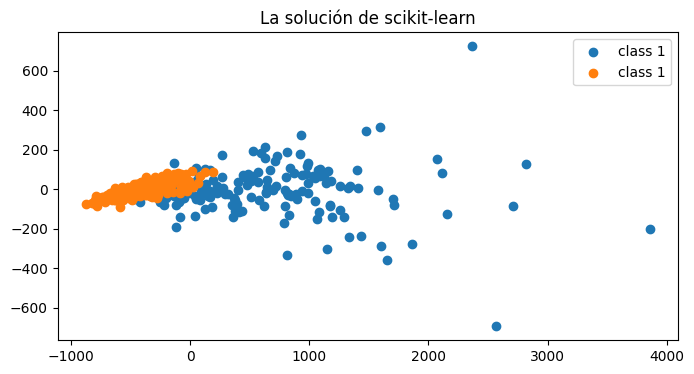

In [51]:
# TODO grafica los datos de dimensionalidad reducida en 2 dimensiones
# investiga plt.scatter y np.where
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for clase in range(2):
    class_idx = np.where(target_train == clase)
    ax.scatter(
        X_low_dim[class_idx, 0],
        X_low_dim[class_idx, 1],
        label = f"class {c}"
    )
ax.set_title("La solución de scikit-learn")
ax.legend()


### Otros métodos de reducción de dimensionalidad

Como PCA, existen otras alternativas para reducir la dimensionalidad de los datos. Una muy popular es el algoritmo de TSNE.
Mientras que ambos métodos sirven el mismo propósito, se utilizan en situaciones distintas. PCA normalmente se utiliza cuando queremos reducir dimensionalidades muy altas, a unas pequeñas por ejemplo reducir de 100 a 50 o 10 dimensiones. 

Por otro lado TSNE funciona bien cuando tenemos una dimensionalidad relativamente baja (entre 20 y 5 por ejemplo) a una más pequeña que podamos visualizar (por ejemplo entre 3 y 1).
TSNE tiene un hiperparámetro adicional a la cantidad de componentes de salida, llamado "perplexidad". Si te interesa conocer más sobre TSNE puedes revisar la [documentación de sci-kit learn](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). TSNE se utiliza principalmente para análisis y visualización.


(426, 2)


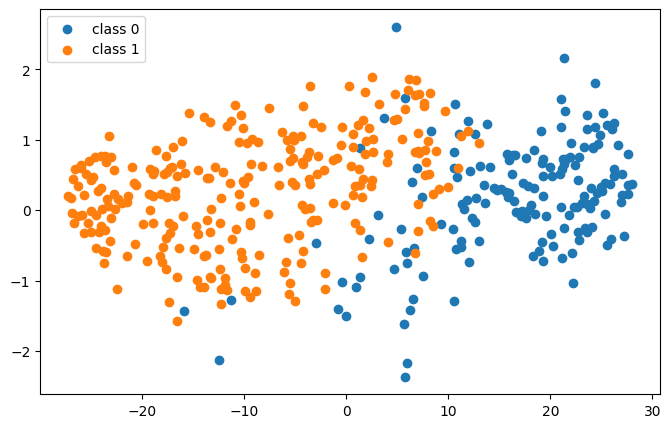

In [52]:
from sklearn.manifold import TSNE

X = data_train.to_numpy()
tsne = TSNE(n_components=2, perplexity=50)
reduced_x = tsne.fit_transform(X)
print(reduced_x.shape)

fig, ax = plt.subplots(figsize=(8, 5))
for c in range(2):
    class_idx = np.where(target_train == c)
    ax.scatter(
        reduced_x[class_idx, 0],
        reduced_x[class_idx,1], 
        label = f"class {c}"
    )
ax.legend()

## 3. Reducción de dimensionalidad aplicado a tareas adicionales
PCA normalmente se utiliza cuando queremos visualizar lo que ha aprendido nuestro algoritmo para entradas de alta dimensionalidad. Tenemos dos opciones

1. Podemos entrenar con el dataset reducido un algoritmo de clasificación, como regresión logística.
2. Podemos entrenar regresión logística en alta dimensionalidad y usar PCA para reducir la dimensionalidad y visualizar el resultado.

En ambos casos necesitamos poder reducir la dimensionalidad. En esta sección, utiliza la librería de sklearn para resolver lo que se te indique.

### 3.1 Entrenando en alta dimensionalidad
En las siguientes celdas probaremos analizar la calidad de la predicción si entrenamos en alta y en baja dimensionalidad. Completa la siguiente celda  para generar las predicciones del conjunto de entrenamiento al entrenar en alta y baja dimensionalidad respectivamente.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ====================  ALTA dimensionalidad ====================#
@ignore_warnings(category=ConvergenceWarning)
def train_pred_high_dim(x_train, y_train, x_test, y_test, dim_red='PCA'):
    # TODO: Entrena un modelo de regresión logística para data_train, target_train en ALTA dimensionalidad
    model = LogisticRegression()
    model = model.fit(x_train,y_train)
    # TODO: Determina las predicciones para x_test
    pred = model.predict(x_test)

    # TODO: Calcula e imprime el accuracy para la predicción
    score = np.mean(pred)
    print("Accuracy: ", score)

    # TODO: Reduce la dimensionalidad de los datos data_test usando PCA y TSNE respectivamente
    if dim_red == 'TSNE':
        reduced_test = TSNE(n_components=2)
        reduced_test = reduced_test.fit_transform(x_test,y_test)
    else:
        reduced_test = PCA(n_components=2)
        reduced_test = reduced_test.fit_transform(x_test)
    return pred, reduced_test


La siguiente celda graficará usando tu implementación anterior, las predicciones correctas hechas por el modelo entrenado en alta dimensionalidad para el conjunto de prueba en verde y las predicciones incorrectas en rojo.

Accuracy:  0.6223776223776224
Accuracy:  0.6223776223776224
Accuracy:  0.6223776223776224
Accuracy:  0.6223776223776224


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


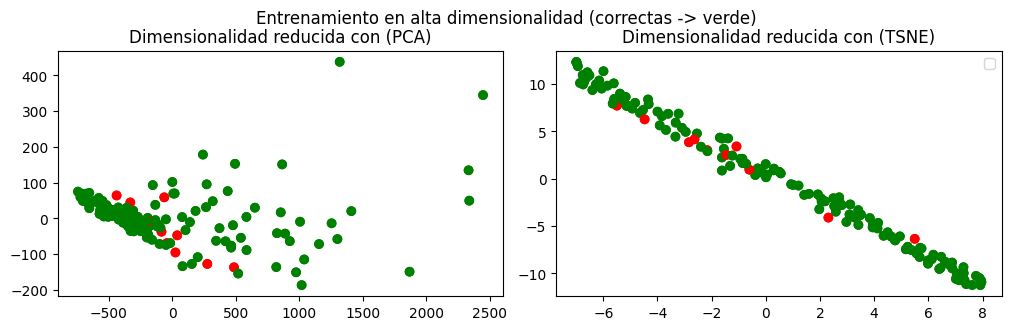

<Figure size 640x480 with 0 Axes>

In [54]:
def plot_preds(reduced_data, pred, target, ax, title):
    c =  np.where(pred == target, 'g', 'r')
    ax.scatter(
        reduced_data[:, 0],
        reduced_data[:, 1],
        color = c 
    )
    ax.set_title(title)
    return ax

# Train set
X = data_train.to_numpy()
y = target_train.to_numpy()

# Test set
X_test = data_test.to_numpy()
y_test = target_test.to_numpy()

fig, ax = plt.subplots(1, 2, figsize=(10, 3), constrained_layout=True)
fig.suptitle(f"Entrenamiento en alta dimensionalidad (correctas -> verde)", y=1.05)
############ Originales #############
for c in range(2):
    # =========  Visualizacion de predicciones ==== #
    pred, reduced_x = train_pred_high_dim(X, y, X_test, y_test, 'PCA')
    ax[0] = plot_preds(reduced_x, pred, y_test, ax[0], 'Dimensionalidad reducida con (PCA)')

    # Entrenamiento baja dimensionalidad
    pred, reduced_x = train_pred_high_dim(X, y, X_test, y_test, 'TSNE')
    ax[1] = plot_preds(reduced_x, pred, y_test, ax[1], 'Dimensionalidad reducida con (TSNE)')
plt.legend()
plt.show()
plt.tight_layout()

### 3.1 Entrenando en datos reducidos
En las siguientes celdas probaremos analizar la calidad de la predicción si entrenamos en alta y en baja dimensionalidad. Completa la siguiente celda  para generar las predicciones del conjunto de entrenamiento al entrenar en alta y baja dimensionalidad respectivamente.

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.decomposition import PCA
import numpy as np

# ====================  BAJA dimensionalidad ====================#
@ignore_warnings(category=ConvergenceWarning)
def train_pred_low_dim(x_train, y_train, x_test, y_test):
    n = x_train.shape[0]
    # TODO: Entrena un modelo DE PCA usando x_train para reducir la dimensionalidad a 2 dimensiones
    pca = PCA(n_components=2)
    # TODO: Utiliza el modelo anterior para reducir la dimensionalidad de x_train a N, 2
    reduced_train = pca.fit_transform(x_train)

    assert reduced_train.shape == (n, 2), f"x_train_reduced debería ser {n,2} pero es {reduced_train.shape}"

    # TODO: Entrena un modelo de regresión logística para usando x_train_reduced
    model = LogisticRegression()
    model = model.fit(reduced_train, y_train)
    # TODO: Reduce la dimensionalidad de los datos data_test usando EL MISMO MODELO de PCA
    # que el que usaste para reducir x_train. No lo entrenes de nuevo
    reduced_test = pca.fit_transform(x_test)

    # TODO: Determina las predicciones para reduced_test
    pred = model.predict(reduced_test)

    # TODO: Calcula e imprime el accuracy de la predicción
    score = np.mean(pred)
    print(f"Accuracy: {score}")
    return pred, reduced_train, reduced_test

Puedes usar la siguiente celda para validar que lo que regresa el código anterior tenga las dimensionalidades esperadas.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.5804195804195804


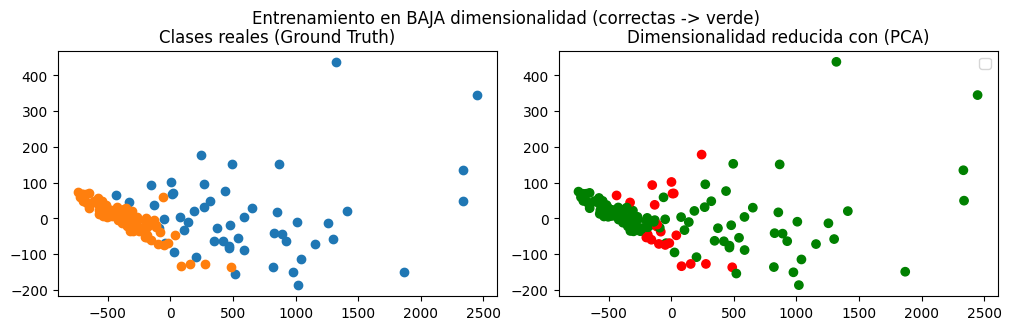

<Figure size 640x480 with 0 Axes>

In [70]:
# Train set
X = data_train.to_numpy()
y = target_train.to_numpy()

# Test set
X_test = data_test.to_numpy()
y_test = target_test.to_numpy()

fig, ax = plt.subplots(1, 2, figsize=(10, 3), constrained_layout=True)
fig.suptitle(f"Entrenamiento en BAJA dimensionalidad (correctas -> verde)", y=1.05)
############ Originales #############
# =========  Visualizacion de predicciones ==== #
# Entrenamiento baja dimensionalidad PCA
pred, reduced_xtrain, reduced_xtest = train_pred_low_dim(X, y, X_test, y_test)
for c in range(2):
    # Clases reales
    ax[0].scatter(
        reduced_xtest[y_test == c][:, 0],
        reduced_xtest[y_test == c][:, 1],
    )
    ax[0].set_title('Clases reales (Ground Truth)')

ax[1] = plot_preds(reduced_xtest, pred, y_test, ax[1], 'Dimensionalidad reducida con (PCA)')
plt.legend()
plt.show()
plt.tight_layout()

## En las imágenes mostramos:
- En verde, los puntos clasificados correctamente
- En rojo, los puntos clasificados incorrectamente

Considerando las imágenes del entrenamiento de alta y baja dimensionalidad, responde:

- Para el ejemplo de regresión logística y clasificación de tumores. ¿Cuál modelo tiene mejor accuracy?¿Funciona mejor entrenar en alta o baja dimensionalidad? El modelo de alta dimensionalidad. Para entrenar es mejor en alta, ya que se crea un descenso de gradiente que nos da lo necesario para clasificar.
- Investiga: ¿Es posible para T-SNE reducir la dimensionalidad de datos nuevos usando el mismo modelo que para los datos de entrenamiento? No puede
- ¿Por qué en el entrenamiento de baja dimensionalidad se omite TSNE? Porque el algoritmo no puede reducir las dimensiones del dataset
- ¿Es posible para PCA reducir la dimensionalidad de datos nuevos usando el mismo modelo que para los datos de entrenamiento? Si porque es un método que utiliza una función para reducir las dimensiones del dataset
- ¿De que nos puede servir reducir la dimensionalidad de los datos? Nos sirve para poder visualizar las variables en una sola dimensión